## ЛИНЕЙНАЯ РЕГРЕССИЯ С MLFLOW

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import mlflow
from mlflow.models.signature import infer_signature
import mlflow.sklearn
from urllib.parse import urlparse
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from IPython.display import Image, display
import warnings

warnings.filterwarnings("ignore")

In [7]:
"""Autolog позволяет регистрировать метрики, параметры и модели без необходимости явных операторов журнала"""
mlflow.autolog()

2023/07/21 10:35:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [8]:
"""Для хранения артифактов запусков в дериктории отдельного эксперимента"""
experiment = mlflow.set_experiment("SINUSI")

In [9]:
"""Генерация данных"""
x = np.linspace(-1, 1, 101).reshape((-1, 1))
y = 2 * x + np.random.randn(*x.shape) * 0.33

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [10]:
"""явное обозначение начала отслеживания обучения модели"""
with mlflow.start_run(run_name='linnear_regression_sklean') as run:
    model1 = LinearRegression().fit(X_train, y_train)

## Визуализация модели полученной в результате обучения линейной регрессии

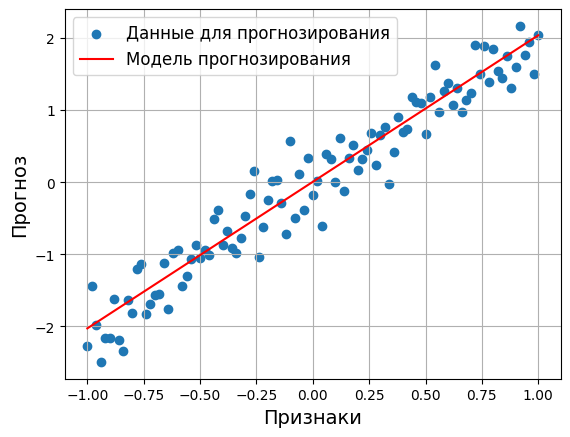

In [11]:
y1 = model1.predict(x)
plt.scatter(x, y, label=r'Данные для прогнозирования')
plt.plot(x, y1, c='r', label=r'Модель прогнозирования')
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.xlabel(r'Признаки', fontsize=14)
plt.ylabel(r'Прогноз', fontsize=14)
plt.show()